<a href="https://colab.research.google.com/github/Xmagnop/Classification-Algorithms/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clusterização

Clusterização é a tarefa de dividir um conjunto de objetos em grupos, de modo que objetos similares fiquem no mesmo grupo e objetos diferentes fiquem em grupos separados.


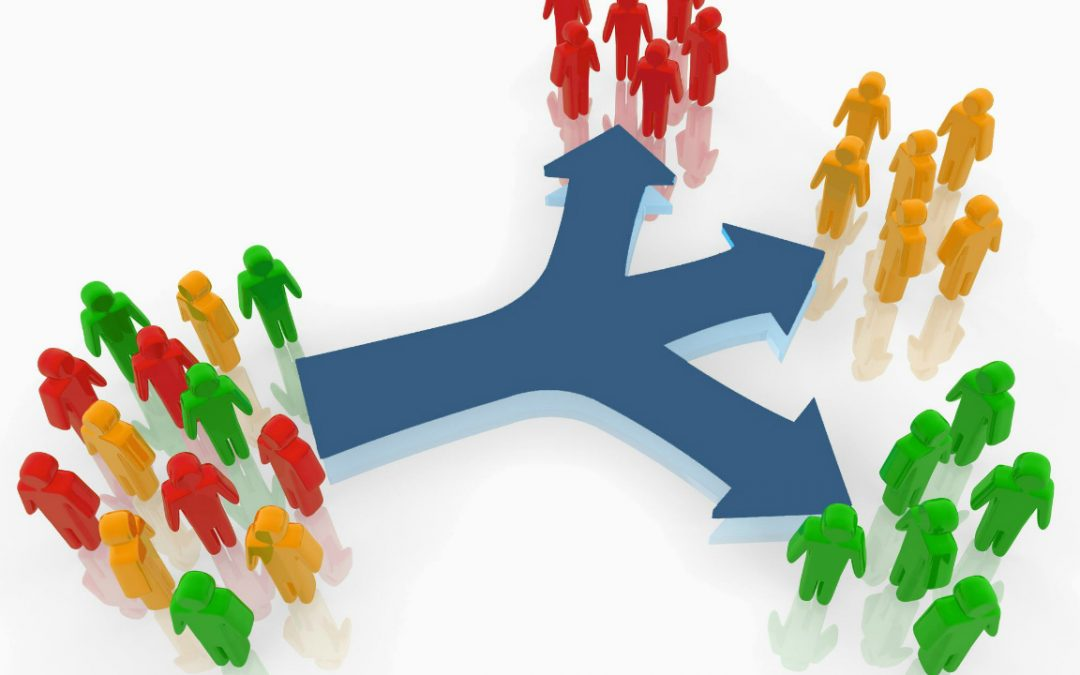

#Algoritmo K-means

Ele tenta separar os dados em K (um número predefinido) clusters, de acordo com a distância de cada ponto até algo chamado de centróide.

Um centróide é como um protótipo para um cluster. Na maioria das técnicas, K pontos aleatórios do dataset são escolhidos para serem as coordenadas dos centróides iniciais. Então cada instância desses dados é atribuída ao centroide mais próximo.

Nas demais iterações a posição dos centróides é calculada através da distancia média entre todos os pontos atribuídos àquele centroide na última iteração. O algoritmo termina quando a posição dos centróides não é mais modificada ou a distancia dessa mudança é menor que um threshold predefinido.


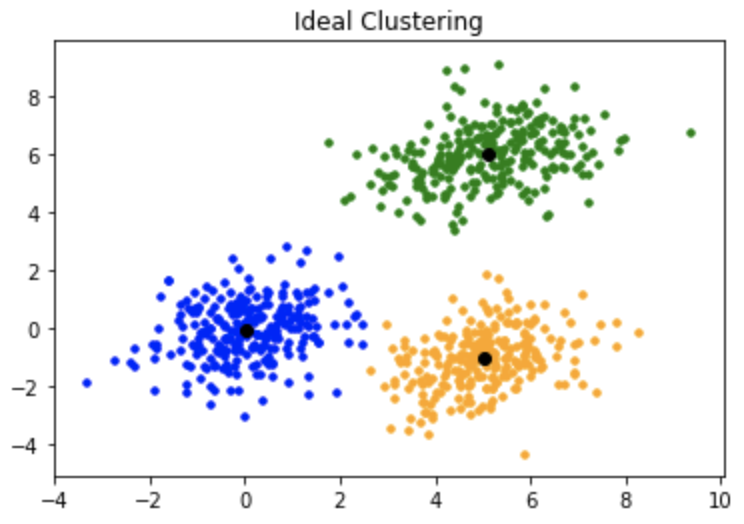

#Aplicações do Algoritmo K-means

####O algoritmo K-means é amplamente utilizado em diversas áreas. Aqui estão algumas aplicações práticas:

1. Segmentação de Clientes: Empresas utilizam K-means para segmentar clientes com base em comportamento de compra, ajudando na personalização de marketing.

2. Detecção de Anomalias: Na segurança de redes, o algoritmo ajuda a identificar padrões anômalos, como atividades suspeitas.

3. Agrupamento de Documentos: Em processamento de linguagem natural, K-means pode agrupar documentos ou artigos semelhantes, facilitando a organização de conteúdo.

4. Recomendação de Produtos: Plataformas de e-commerce utilizam K-means para sugerir produtos com base nas preferências de clientes semelhantes.

5. Localização de Lojas: Empresas usam K-means para decidir onde abrir novas lojas, agrupando dados demográficos e de vendas.

#Inicialização Random

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Gerar dados com 50 amostras
X = np.random.randint(25, 50, (50, 2))
Y = np.random.randint(60, 85, (50, 2))
Z = np.vstack((X, Y))
Z = np.float32(Z)

# Definir critérios
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Aplicar K-means++ initialization
ret, label, center = cv.kmeans(Z, 2, None, criteria, 10, cv.KMEANS_PP_CENTERS)

# Função para plotar os resultados
def plot_clusters(Z, labels, centers, title):
    A = Z[labels.ravel() == 0]
    B = Z[labels.ravel() == 1]
    plt.scatter(A[:, 0], A[:, 1], label='Cluster 1')
    plt.scatter(B[:, 0], B[:, 1], c='r', label='Cluster 2')
    plt.scatter(centers[:, 0], centers[:, 1], s=80, c='y', marker='s', label='Centroids')
    plt.title(title)
    plt.xlabel('Height')
    plt.ylabel('Weight')
    plt.legend()
    plt.show()

# Plotar os resultados
plot_clusters(Z, label, center, 'K-means++ Initialization with 50 Samples')


#Inicialização K++

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Gerar dados com 100 amostras
X = np.random.randint(25, 50, (100, 2))
Y = np.random.randint(60, 85, (100, 2))
Z = np.vstack((X, Y))
Z = np.float32(Z)

# Definir critérios
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Aplicar Random initialization
ret, label, center = cv.kmeans(Z, 2, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Função para plotar os resultados
def plot_clusters(Z, labels, centers, title):
    A = Z[labels.ravel() == 0]
    B = Z[labels.ravel() == 1]
    plt.scatter(A[:, 0], A[:, 1], label='Cluster 1')
    plt.scatter(B[:, 0], B[:, 1], c='r', label='Cluster 2')
    plt.scatter(centers[:, 0], centers[:, 1], s=80, c='y', marker='s', label='Centroids')
    plt.title(title)
    plt.xlabel('Height')
    plt.ylabel('Weight')
    plt.legend()
    plt.show()

# Plotar os resultados
plot_clusters(Z, label, center, 'Random Initialization with 100 Samples')


#Medidas de avaliação de clusters

O tema "Medidas de Avaliação de Clusters" refere-se ao conjunto de métricas e métodos usados para avaliar a qualidade e a eficácia de agrupamentos (clusters) gerados em técnicas de clustering, uma abordagem de aprendizado de máquina não supervisionada. Em um cenário onde um Cientista de Dados trabalha com grandes volumes de dados de interações de clientes em uma empresa de varejo, o objetivo do clustering é identificar padrões ocultos e segmentar os clientes de forma significativa. Essas segmentações podem então ser usadas para decisões estratégicas, como campanhas de marketing personalizadas ou otimização de produtos.

Porém, diferentes algoritmos de clustering podem produzir resultados variados,logo surge a necessidade de avaliar a qualidade desses agrupamentos. É aqui que as medidas de avaliação de clusters entram em jogo. Elas fornecem um critério quantitativo para avaliar e comparar os diferentes métodos, garantindo que os clusters formados sejam coesos, distintos e úteis para os objetivos do negócio.

Essas métricas permitem que os cientistas de dados analisem e comparem diferentes resultados de clustering de forma objetiva, ajudando na escolha do método que melhor representa a segmentação de clientes ou padrões do dataset.

#Silhouette Score

O Silhouette Score também é uma métrica bastante usada para avaliar a clusterização. Porém, o Silhouette Score fornece uma medida compreensiva que leva em conta tanto a coesão quanto a separação dos clusters.

Chamando a coesão de a e separação de b o Silhouette Score para um único ponto é obtido pela fórmula s = (b-a)/(max(a,b)) .

O valor dessa métrica varia de menos um a um. Valores próximos de um indicam que o ponto está bem ajustado ao seu próprio cluster e mal ajustado aos clusters vizinhos. Se o valor é próximo de zero, temos um ponto que está próximo a um limite de decisão entre dois clusters.

Já um valor negativo indica que o ponto pode ter sido atribuído ao cluster errado. Além disso, podemos calcular o Silhouette score para todo o conjunto de pontos. A Sklearn possui essa métrica implementada.

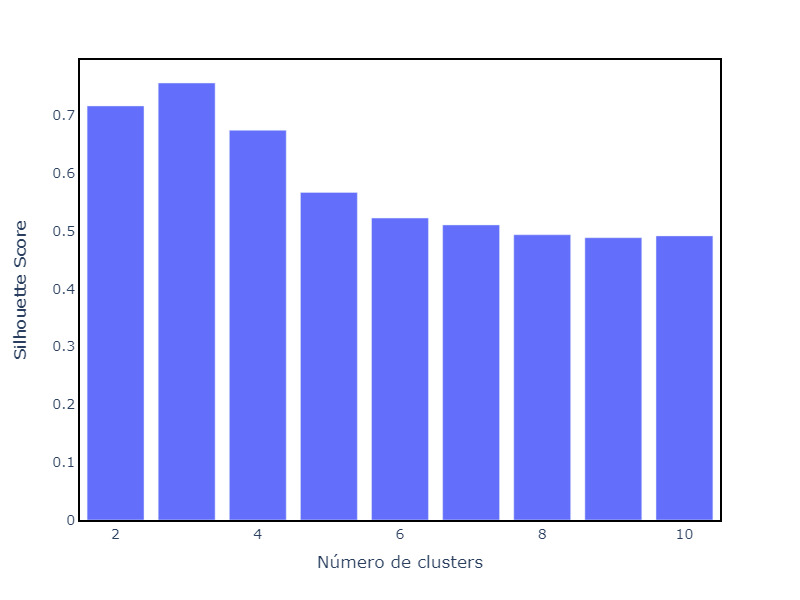

#Método do Cotovelo

Esse método, quando aplicado a clusterização, também tem o objetivo de identificar o número ideal de clusters. Nesse caso, identificamos o ponto em que a inclusão de clusters adicionais resulta em ganhos marginais na explicação da variância total nos dados.

Isto é, busca-se o número de clusters onde a adição de mais grupos apenas contribui minimamente para a explicação da variância observada. A coesão é a métrica que pode ser usada para medir a variância dos grupos.

Calculando os valores de coesão para um número de clusters específico dividido pela soma do valor de coesão de todos os clusters testados temos a Porcentagem da Variância Explicada, como se pode observar na imagem a seguir.

Nesse caso, o ponto no gráfico onde o aumento do número de clusters deixa de representar um ganho substancial na variância é o número de três clusters, o “cotovelo” do gráfico.

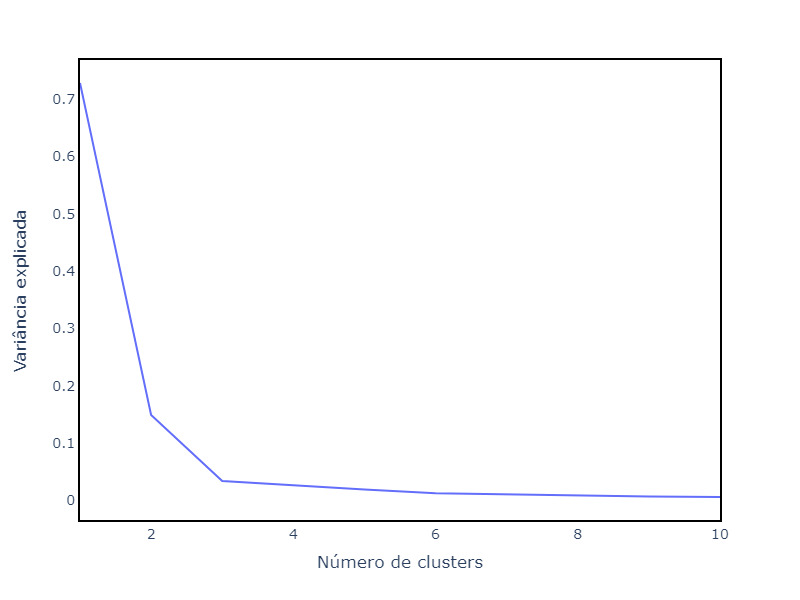

# Hands-On

##Importação das Bibliotecas


In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

##Carregando e exibindo as características do Dataset

In [2]:
df = pd.read_csv("/content/Mall_Customers.csv")
data=df.head(30)

In [3]:
data.shape

(30, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              30 non-null     int64 
 1   Gender                  30 non-null     object
 2   Age                     30 non-null     int64 
 3   Annual Income (k$)      30 non-null     int64 
 4   Spending Score (1-100)  30 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


##Gráfico Scatter Plot

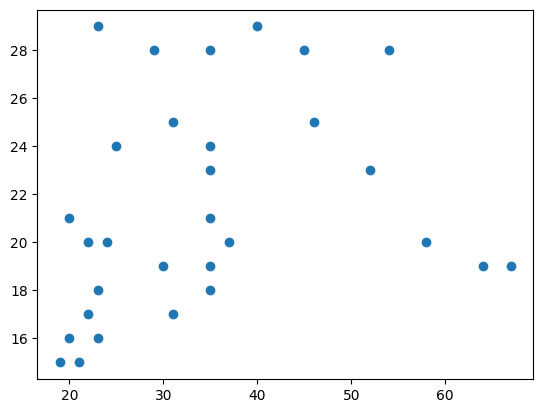

In [5]:
plt.scatter(data['Age'],data['Annual Income (k$)'])

##Treinamento do Modelo

In [6]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [7]:
y_predict=km.fit_predict(data[['Age','Annual Income (k$)']])
y_predict

array([1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 1, 0, 2, 2, 1,
       0, 2, 0, 2, 0, 2, 2, 1], dtype=int32)

In [8]:
data['cluster'] = y_predict
data.head(10)

<ipython-input-8-5014423d271a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = y_predict


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2
5,6,Female,22,17,76,1
6,7,Female,35,18,6,2
7,8,Female,23,18,94,1
8,9,Male,64,19,3,0
9,10,Female,30,19,72,2


##Visualizando os Clusters

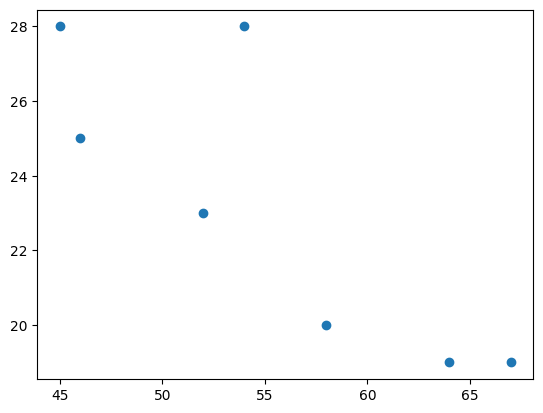

In [10]:
d1 = data[data.cluster==0]
d2 = data[data.cluster==1]
d3 = data[data.cluster==2]

plt.scatter(d1['Age'],d1['Annual Income (k$)'])

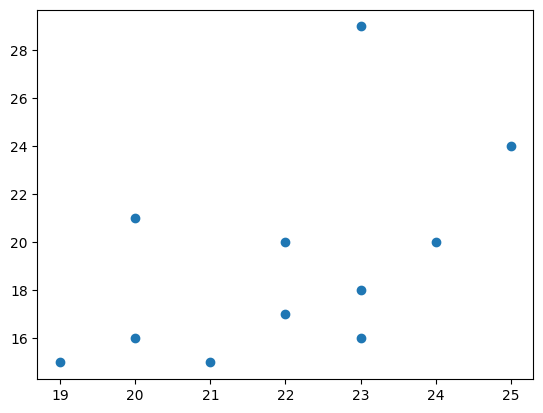

In [11]:
plt.scatter(d2['Age'],d2['Annual Income (k$)'])

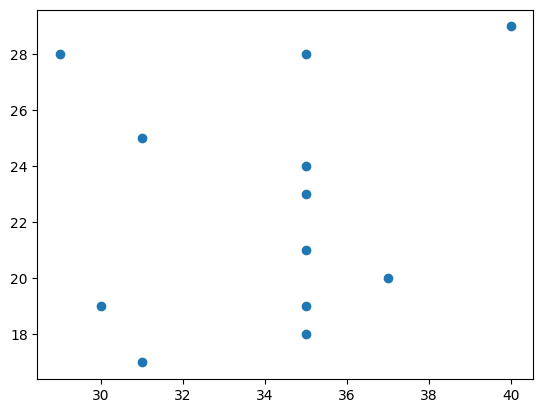

In [12]:
plt.scatter(d3['Age'],d3['Annual Income (k$)'])

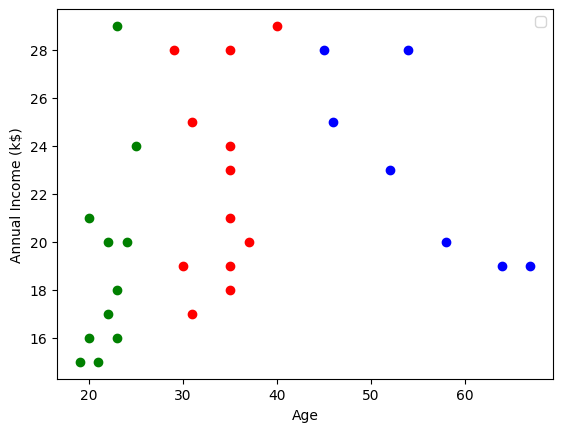

In [13]:
plt.scatter(d1['Age'],d1['Annual Income (k$)'],color='blue')
plt.scatter(d2['Age'],d2['Annual Income (k$)'],color='green')
plt.scatter(d3['Age'],d3['Annual Income (k$)'],color='red')

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()

##Encontrando a faixa de idade e renda anual

In [15]:
data['Age'].max()

67

In [16]:
data['Age'].min()

19

In [17]:
data['Annual Income (k$)'].max()

29

In [18]:
data['Annual Income (k$)'].min()

15

##Dimensionando os valores de idade e renda anual para o intervalo de 0 a 1

In [19]:
scaler =  MinMaxScaler()

data['Annual Income (k$)'] = scaler.fit_transform(data[['Annual Income (k$)']])


data['Age'] = scaler.fit_transform(data[['Age']])


data.head()

<ipython-input-19-3f40e67447ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Annual Income (k$)'] = scaler.fit_transform(data[['Annual Income (k$)']])
<ipython-input-19-3f40e67447ec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = scaler.fit_transform(data[['Age']])


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,0.000000,0.000000,39,1
1,2,Male,0.041667,0.000000,81,1
2,3,Female,0.020833,0.071429,6,1
3,4,Female,0.083333,0.071429,77,1
4,5,Female,0.250000,0.142857,40,2


##Ajuste de modelo

In [20]:
km = KMeans(n_clusters=3)
y_predict =  km.fit_predict(data[['Age','Annual Income (k$)']])
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [21]:
data['cluster'] = y_predict
#data.drop('cluster',axis = 'columns',inplace = True)
data

<ipython-input-21-772532a9968e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = y_predict


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,0.000000,0.000000,39,0
1,2,Male,0.041667,0.000000,81,0
2,3,Female,0.020833,0.071429,6,0
3,4,Female,0.083333,0.071429,77,0
4,5,Female,0.250000,0.142857,40,0
5,6,Female,0.062500,0.142857,76,0
6,7,Female,0.333333,0.214286,6,0
7,8,Female,0.083333,0.214286,94,0
8,9,Male,0.937500,0.285714,3,2
9,10,Female,0.229167,0.285714,72,0


##Encontrando e visualizando os centroides

In [22]:
km.cluster_centers_

array([[0.15555556, 0.22380952],
       [0.35795455, 0.81818182],
       [0.859375  , 0.375     ]])

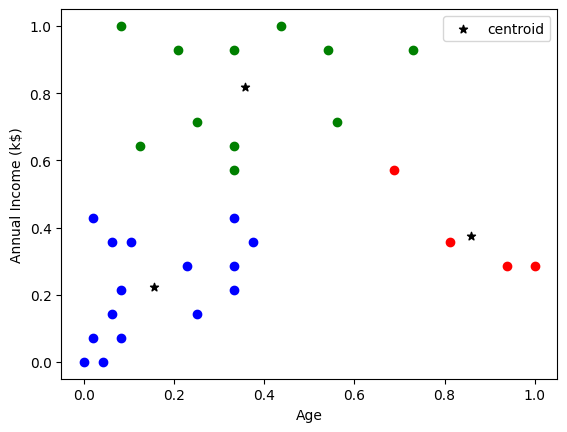

In [23]:
d1 = data[data.cluster==0]
d2 = data[data.cluster==1]
d3 = data[data.cluster==2]


plt.scatter(d1['Age'],d1['Annual Income (k$)'],color='blue')
plt.scatter(d2['Age'],d2['Annual Income (k$)'],color='green')
plt.scatter(d3['Age'],d3['Annual Income (k$)'],color='red')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color ='black',marker ='*',label = 'centroid')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()